# Exploración inicial dataset S10

## Librerias

In [1]:
!pip install plotly
!pip install wordcloud

In [2]:
import pandas as pd
import numpy as np
import scipy as sp
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Carga de datos

In [3]:
S10_dataset = pd.read_csv("C:\\Users\\camil\\Downloads\\The Bridge\\08_19_2020.csv", sep =";")

## Exploración inicial

In [4]:
S10_dataset.head()

,gameId,league,split,playoffs,date,game,patch,gamelength,t1_playerid,t1_ban1,...,t2p5_monsterkills,t2p5_monsterkillsownjungle,t2p5_monsterkillsenemyjungle,t2p5_cspm,t2p5_goldat10,t2p5pat10,t2p5_csat10,t2p5_goldat15,t2p5pat15,t2p5_csat15
0,1241318,KeSPA,NaN,0,03/01/2020 7:33,1,9.24,2220,SANDBOX Gaming,LeBlanc,...,27.0,18.0,0.0,8.2162,2845.0,4432.0,65.0,4723.0,7202.0,118.0
1,1241322,KeSPA,NaN,0,03/01/2020 9:00,2,9.24,2227,T1,Syndra,...,42.0,15.0,5.0,8.5406,3657.0,5135.0,93.0,6627.0,8784.0,162.0
2,1241324,KeSPA,NaN,0,03/01/2020 10:05,3,9.24,1711,T1,LeBlanc,...,8.0,1.0,0.0,8.2759,3282.0,4851.0,90.0,5252.0,7933.0,150.0
3,1241328,KeSPA,NaN,0,03/01/2020 10:57,4,9.24,1999,T1,Rumble,...,16.0,4.0,9.0,9.4247,3351.0,4671.0,92.0,5190.0,7374.0,144.0
4,1241386,KeSPA,NaN,0,04/01/2020 5:33,1,9.24,1812,DRX,Qiyana,...,27.0,12.0,4.0,8.9404,3587.0,4809.0,88.0,5114.0,7078.0,134.0


In [5]:
S10_dataset.dtypes

gameId            object
league            object
split             object
playoffs           int64
date              object
                  ...   
t2p5pat10        float64
t2p5_csat10      float64
t2p5_goldat15    float64
t2p5pat15        float64
t2p5_csat15      float64
Length: 408, dtype: object

In [6]:
S10_dataset.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5149 entries, 0 to 5148
Data columns (total 408 columns):
 #    Column                        Non-Null Count  Dtype  
---   ------                        --------------  -----  
 0    gameId                        5148 non-null   object 
 1    league                        5149 non-null   object 
 2    split                         3566 non-null   object 
 3    playoffs                      5149 non-null   int64  
 4    date                          5149 non-null   object 
 5    game                          5149 non-null   int64  
 6    patch                         5149 non-null   float64
 7    gamelength                    5149 non-null   int64  
 8    t1_playerid                   5149 non-null   object 
 9    t1_ban1                       4839 non-null   object 
 10   t1_ban2                       4843 non-null   object 
 11   t1_ban3                       5116 non-null   object 
 12   t1_ban4                       4833 non-null   

In [7]:
S10_dataset.describe()

,playoffs,game,patch,gamelength,t1_result,t1_firstblood,t1_firstdragon,t1_dragons,t1_elementaldrakes,t1_infernals,...,t2p5_monsterkills,t2p5_monsterkillsownjungle,t2p5_monsterkillsenemyjungle,t2p5_cspm,t2p5_goldat10,t2p5pat10,t2p5_csat10,t2p5_goldat15,t2p5pat15,t2p5_csat15
count,5149.000000,5149.000000,5149.000000,5149.000000,5149.000000,5148.000000,5095.000000,5149.000000,5067.000000,5067.000000,...,5148.000000,5148.000000,5148.000000,5149.000000,5095.000000,5095.000000,5095.000000,5091.000000,5091.000000,5091.000000
mean,0.088367,1.511556,10.091468,1954.632356,0.529229,0.505633,0.465751,2.445912,2.322873,0.585159,...,14.986791,8.168803,1.971057,7.610857,3224.673405,4495.384102,74.880275,5137.865449,7101.329012,120.271459
std,0.283855,0.786265,0.058239,346.563783,0.499193,0.500017,0.498875,1.475926,1.368083,0.798242,...,12.818328,8.323369,3.725231,1.163776,358.527040,396.128964,11.336944,644.707323,625.069560,16.407440
min,0.000000,1.000000,9.240000,1005.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.867100,1919.000000,2021.000000,12.000000,2841.000000,3346.000000,19.000000
25%,0.000000,1.000000,10.060000,1711.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,5.000000,1.000000,0.000000,6.844600,2995.000000,4273.000000,68.000000,4697.000000,6713.500000,110.000000
50%,0.000000,1.000000,10.110000,1913.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.000000,...,12.000000,6.000000,0.000000,7.603800,3190.000000,4540.000000,76.000000,5049.000000,7145.000000,121.000000
75%,0.000000,2.000000,10.130000,2158.000000,1.000000,1.000000,1.000000,4.000000,4.000000,1.000000,...,22.000000,12.000000,3.000000,8.368600,3417.500000,4773.500000,83.000000,5492.000000,7529.000000,131.000000
max,1.000000,5.000000,10.160000,3751.000000,1.000000,1.000000,1.000000,10.000000,4.000000,4.000000,...,136.000000,106.000000,36.000000,11.822200,5296.000000,5756.000000,107.000000,9006.000000,9479.000000,171.000000


In [8]:
S10_dataset.shape

(5149, 408)

In [9]:
# Cardinalidad
for i in S10_dataset.select_dtypes(include=object):
    print(f"La cardinalidad de la variable {i} es {(S10_dataset[i].nunique()/S10_dataset.shape[0])*100:.2f}%")

La cardinalidad de la variable gameId es 99.98%
La cardinalidad de la variable league es 0.45%
La cardinalidad de la variable split es 0.14%
La cardinalidad de la variable date es 97.63%
La cardinalidad de la variable t1_playerid es 4.74%
La cardinalidad de la variable t1_ban1 es 2.08%
La cardinalidad de la variable t1_ban2 es 2.12%
La cardinalidad de la variable t1_ban3 es 2.16%
La cardinalidad de la variable t1_ban4 es 2.49%
La cardinalidad de la variable t1_ban5 es 2.41%
La cardinalidad de la variable t2_playerid es 4.74%
La cardinalidad de la variable t2_ban1 es 1.96%
La cardinalidad de la variable t2_ban2 es 2.04%
La cardinalidad de la variable t2_ban3 es 2.06%
La cardinalidad de la variable t2_ban4 es 2.62%
La cardinalidad de la variable t2_ban5 es 2.43%
La cardinalidad de la variable t1p1_position es 0.02%
La cardinalidad de la variable t1p1_player es 6.62%
La cardinalidad de la variable t1p1_team es 4.74%
La cardinalidad de la variable t1p1_champion es 0.99%
La cardinalidad de 

## Limpieza

### Limpieza dataframe principal

### Separando las ligas mayoritarias

#### LPL

In [10]:
lpl = S10_dataset[S10_dataset["league"] == "LPL"]

In [11]:
lpl.head()

,gameId,league,split,playoffs,date,game,patch,gamelength,t1_playerid,t1_ban1,...,t2p5_monsterkills,t2p5_monsterkillsownjungle,t2p5_monsterkillsenemyjungle,t2p5_cspm,t2p5_goldat10,t2p5pat10,t2p5_csat10,t2p5_goldat15,t2p5pat15,t2p5_csat15
10,5655-7249,LPL,Spring,0,13/01/2020 9:22,1,10.1,2640,Invictus Gaming,Pantheon,...,8.0,0.0,0.0,3.5682,2898.0,4137.0,59.0,4738.0,6159.0,84.0
11,5655-7250,LPL,Spring,0,13/01/2020 10:37,2,10.1,1814,Invictus Gaming,Pantheon,...,24.0,12.0,0.0,7.6075,3492.0,4698.0,63.0,6404.0,8095.0,101.0
12,5656-7252,LPL,Spring,0,13/01/2020 11:26,1,10.1,2283,LGD Gaming,Pantheon,...,14.0,10.0,0.0,6.7806,2963.0,4413.0,71.0,4100.0,5983.0,94.0
13,5655-7251,LPL,Spring,0,13/01/2020 11:31,3,10.1,1943,Invictus Gaming,Pantheon,...,21.0,17.0,1.0,8.1215,3375.0,5040.0,84.0,5463.0,7782.0,131.0
14,5656-7253,LPL,Spring,0,13/01/2020 12:29,2,10.1,1517,LNG Esports,Qiyana,...,8.0,8.0,0.0,8.4245,3070.0,4198.0,65.0,5022.0,7376.0,125.0


In [12]:
lpl.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 711 entries, 10 to 5074
Data columns (total 408 columns):
 #    Column                        Non-Null Count  Dtype  
---   ------                        --------------  -----  
 0    gameId                        711 non-null    object 
 1    league                        711 non-null    object 
 2    split                         711 non-null    object 
 3    playoffs                      711 non-null    int64  
 4    date                          711 non-null    object 
 5    game                          711 non-null    int64  
 6    patch                         711 non-null    float64
 7    gamelength                    711 non-null    int64  
 8    t1_playerid                   711 non-null    object 
 9    t1_ban1                       702 non-null    object 
 10   t1_ban2                       702 non-null    object 
 11   t1_ban3                       702 non-null    object 
 12   t1_ban4                       701 non-null    objec

In [13]:
lpl.describe()

,playoffs,game,patch,gamelength,t1_result,t1_firstblood,t1_firstdragon,t1_dragons,t1_elementaldrakes,t1_infernals,...,t2p5_monsterkills,t2p5_monsterkillsownjungle,t2p5_monsterkillsenemyjungle,t2p5_cspm,t2p5_goldat10,t2p5pat10,t2p5_csat10,t2p5_goldat15,t2p5pat15,t2p5_csat15
count,711.000000,711.000000,711.000000,711.000000,711.000000,710.000000,692.000000,711.000000,675.000000,675.000000,...,710.000000,710.000000,710.000000,711.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000
mean,0.064698,1.817159,10.093713,1940.475387,0.530239,0.488732,0.456647,2.392405,2.222222,0.579259,...,15.487324,8.670423,1.802817,7.545782,3260.320809,4535.998555,75.471098,5203.164740,7159.320809,121.541908
std,0.246165,0.785638,0.039724,333.381525,0.499436,0.500225,0.498477,1.476348,1.314531,0.808440,...,12.507791,8.106909,3.440076,1.191906,356.343139,394.768816,11.570111,640.873027,640.706431,16.886434
min,0.000000,1.000000,10.010000,1177.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.094200,2162.000000,3105.000000,24.000000,3782.000000,4882.000000,39.000000
25%,0.000000,1.000000,10.060000,1709.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,6.000000,3.000000,0.000000,6.780000,3038.750000,4302.750000,69.000000,4771.500000,6729.250000,111.000000
50%,0.000000,2.000000,10.100000,1900.000000,1.000000,0.000000,0.000000,2.000000,2.000000,0.000000,...,13.000000,7.000000,0.000000,7.555100,3226.000000,4582.000000,77.000000,5115.500000,7229.500000,123.000000
75%,0.000000,2.000000,10.130000,2121.000000,1.000000,1.000000,1.000000,3.000000,3.000000,1.000000,...,22.000000,13.000000,2.000000,8.265900,3445.500000,4822.250000,83.000000,5564.250000,7619.250000,133.000000
max,1.000000,5.000000,10.160000,3251.000000,1.000000,1.000000,1.000000,10.000000,4.000000,4.000000,...,76.000000,52.000000,27.000000,11.822200,4728.000000,5600.000000,101.000000,7563.000000,8930.000000,171.000000


In [14]:
lpl.shape

(711, 408)

In [15]:
# Cardinalidad
for i in lpl.select_dtypes(include=object):
    print(f"La cardinalidad de la variable {i} es {(lpl[i].nunique()/lpl.shape[0])*100:.2f}%")

La cardinalidad de la variable gameId es 100.00%
La cardinalidad de la variable league es 0.14%
La cardinalidad de la variable split es 0.28%
La cardinalidad de la variable date es 100.00%
La cardinalidad de la variable t1_playerid es 2.39%
La cardinalidad de la variable t1_ban1 es 7.31%
La cardinalidad de la variable t1_ban2 es 8.16%
La cardinalidad de la variable t1_ban3 es 8.72%
La cardinalidad de la variable t1_ban4 es 10.69%
La cardinalidad de la variable t1_ban5 es 11.39%
La cardinalidad de la variable t2_playerid es 2.39%
La cardinalidad de la variable t2_ban1 es 6.05%
La cardinalidad de la variable t2_ban2 es 6.89%
La cardinalidad de la variable t2_ban3 es 8.44%
La cardinalidad de la variable t2_ban4 es 11.11%
La cardinalidad de la variable t2_ban5 es 11.53%
La cardinalidad de la variable t1p1_position es 0.14%
La cardinalidad de la variable t1p1_player es 4.08%
La cardinalidad de la variable t1p1_team es 2.39%
La cardinalidad de la variable t1p1_champion es 4.08%
La cardinalid

#### LCK

In [16]:
lck = S10_dataset[S10_dataset["league"] == "LCK"]

In [17]:
lck.head()

,gameId,league,split,playoffs,date,game,patch,gamelength,t1_playerid,t1_ban1,...,t2p5_monsterkills,t2p5_monsterkillsownjungle,t2p5_monsterkillsenemyjungle,t2p5_cspm,t2p5_goldat10,t2p5pat10,t2p5_csat10,t2p5_goldat15,t2p5pat15,t2p5_csat15
184,1302595,LCK,Spring,0,05/02/2020 6:34,1,10.02,2441,T1,Syndra,...,42.0,25.0,4.0,7.9394,3541.0,4810.0,81.0,5188.0,7068.0,126.0
185,1302628,LCK,Spring,0,05/02/2020 9:00,2,10.02,2870,DAMWON Gaming,Rek'Sai,...,32.0,24.0,4.0,7.9024,3477.0,4650.0,75.0,5558.0,8287.0,128.0
186,1302635,LCK,Spring,0,05/02/2020 10:14,3,10.02,2837,T1,Mordekaiser,...,56.0,27.0,15.0,10.1727,2997.0,4417.0,73.0,4730.0,7102.0,123.0
187,1302651,LCK,Spring,0,05/02/2020 11:33,1,10.02,1748,KT Rolster,Irelia,...,9.0,9.0,0.0,7.7231,3032.0,4370.0,77.0,4717.0,7416.0,129.0
188,1292960,LCK,Spring,0,05/02/2020 13:10,2,10.02,1609,Gen.G,Olaf,...,13.0,12.0,1.0,7.8682,3021.0,4535.0,73.0,4907.0,7626.0,127.0


In [18]:
lck.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 441 entries, 184 to 5087
Data columns (total 408 columns):
 #    Column                        Non-Null Count  Dtype  
---   ------                        --------------  -----  
 0    gameId                        441 non-null    object 
 1    league                        441 non-null    object 
 2    split                         429 non-null    object 
 3    playoffs                      441 non-null    int64  
 4    date                          441 non-null    object 
 5    game                          441 non-null    int64  
 6    patch                         441 non-null    float64
 7    gamelength                    441 non-null    int64  
 8    t1_playerid                   441 non-null    object 
 9    t1_ban1                       440 non-null    object 
 10   t1_ban2                       440 non-null    object 
 11   t1_ban3                       441 non-null    object 
 12   t1_ban4                       441 non-null    obje

In [19]:
lck.describe()

,playoffs,game,patch,gamelength,t1_result,t1_firstblood,t1_firstdragon,t1_dragons,t1_elementaldrakes,t1_infernals,...,t2p5_monsterkills,t2p5_monsterkillsownjungle,t2p5_monsterkillsenemyjungle,t2p5_cspm,t2p5_goldat10,t2p5pat10,t2p5_csat10,t2p5_goldat15,t2p5pat15,t2p5_csat15
count,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,438.000000,438.000000,...,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,439.000000,439.000000,439.000000
mean,0.034014,1.777778,10.082222,1965.680272,0.551020,0.510204,0.462585,2.424036,2.344749,0.625571,...,16.684807,9.866213,2.000000,8.052594,3258.993197,4578.882086,78.213152,5165.993166,7233.854214,125.086560
std,0.181470,0.757121,0.045558,344.708665,0.497955,0.500464,0.499164,1.431548,1.341933,0.783984,...,14.436159,9.925530,3.819805,1.265482,351.351000,378.073652,11.608379,617.392331,625.056693,16.930877
min,0.000000,1.000000,10.020000,1014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.867100,1919.000000,2021.000000,12.000000,2841.000000,3346.000000,19.000000
25%,0.000000,1.000000,10.040000,1714.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,6.000000,3.000000,0.000000,7.361500,3062.000000,4402.000000,72.000000,4733.000000,6893.000000,115.000000
50%,0.000000,2.000000,10.070000,1932.000000,1.000000,1.000000,0.000000,3.000000,3.000000,0.000000,...,14.000000,8.000000,0.000000,8.009800,3232.000000,4626.000000,79.000000,5094.000000,7267.000000,126.000000
75%,0.000000,2.000000,10.130000,2176.000000,1.000000,1.000000,1.000000,4.000000,4.000000,1.000000,...,24.000000,15.000000,3.000000,8.902400,3441.000000,4826.000000,86.000000,5490.000000,7665.000000,136.500000
max,1.000000,5.000000,10.150000,3276.000000,1.000000,1.000000,1.000000,6.000000,4.000000,4.000000,...,90.000000,68.000000,23.000000,11.412700,5296.000000,5547.000000,106.000000,7229.000000,8790.000000,165.000000


In [20]:
lck.shape

(441, 408)

In [21]:
# Cardinalidad
for i in lck.select_dtypes(include=object):
    print(f"La cardinalidad de la variable {i} es {(lck[i].nunique()/lck.shape[0])*100:.2f}%")

La cardinalidad de la variable gameId es 100.00%
La cardinalidad de la variable league es 0.23%
La cardinalidad de la variable split es 0.45%
La cardinalidad de la variable date es 100.00%
La cardinalidad de la variable t1_playerid es 2.72%
La cardinalidad de la variable t1_ban1 es 10.66%
La cardinalidad de la variable t1_ban2 es 11.79%
La cardinalidad de la variable t1_ban3 es 12.93%
La cardinalidad de la variable t1_ban4 es 16.78%
La cardinalidad de la variable t1_ban5 es 18.59%
La cardinalidad de la variable t2_playerid es 2.72%
La cardinalidad de la variable t2_ban1 es 9.30%
La cardinalidad de la variable t2_ban2 es 10.88%
La cardinalidad de la variable t2_ban3 es 13.15%
La cardinalidad de la variable t2_ban4 es 18.14%
La cardinalidad de la variable t2_ban5 es 17.46%
La cardinalidad de la variable t1p1_position es 0.23%
La cardinalidad de la variable t1p1_player es 4.54%
La cardinalidad de la variable t1p1_team es 2.72%
La cardinalidad de la variable t1p1_champion es 8.39%
La cardi

#### LEC

In [22]:
lec = S10_dataset[S10_dataset["league"] == "LEC"]

In [23]:
lec.head()

,gameId,league,split,playoffs,date,game,patch,gamelength,t1_playerid,t1_ban1,...,t2p5_monsterkills,t2p5_monsterkillsownjungle,t2p5_monsterkillsenemyjungle,t2p5_cspm,t2p5_goldat10,t2p5pat10,t2p5_csat10,t2p5_goldat15,t2p5pat15,t2p5_csat15
53,1390161,LEC,Spring,0,24/01/2020 16:17,1,10.01,2059,G2 Esports,Irelia,...,1.0,1.0,0.0,6.7606,3143.0,4814.0,69.0,5538.0,8084.0,126.0
54,1390170,LEC,Spring,0,24/01/2020 17:40,1,10.01,3049,SK Gaming,Lucian,...,22.0,15.0,0.0,6.7891,3218.0,4630.0,84.0,4794.0,7290.0,129.0
55,1390196,LEC,Spring,0,24/01/2020 19:00,1,10.01,2544,Rogue,Rumble,...,32.0,32.0,0.0,8.2075,2837.0,4224.0,63.0,4677.0,6490.0,110.0
56,1390202,LEC,Spring,0,24/01/2020 20:11,1,10.01,2392,Excel Esports,Thresh,...,9.0,4.0,1.0,6.2709,3665.0,5044.0,90.0,5870.0,8125.0,145.0
57,1390213,LEC,Spring,0,24/01/2020 21:18,1,10.01,2554,Fnatic,Lucian,...,23.0,20.0,3.0,8.1049,3175.0,4603.0,77.0,5024.0,7266.0,127.0


In [24]:
lec.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 211 entries, 53 to 4835
Data columns (total 408 columns):
 #    Column                        Non-Null Count  Dtype  
---   ------                        --------------  -----  
 0    gameId                        211 non-null    object 
 1    league                        211 non-null    object 
 2    split                         211 non-null    object 
 3    playoffs                      211 non-null    int64  
 4    date                          211 non-null    object 
 5    game                          211 non-null    int64  
 6    patch                         211 non-null    float64
 7    gamelength                    211 non-null    int64  
 8    t1_playerid                   211 non-null    object 
 9    t1_ban1                       211 non-null    object 
 10   t1_ban2                       211 non-null    object 
 11   t1_ban3                       210 non-null    object 
 12   t1_ban4                       211 non-null    objec

In [25]:
lec.describe()

,playoffs,game,patch,gamelength,t1_result,t1_firstblood,t1_firstdragon,t1_dragons,t1_elementaldrakes,t1_infernals,...,t2p5_monsterkills,t2p5_monsterkillsownjungle,t2p5_monsterkillsenemyjungle,t2p5_cspm,t2p5_goldat10,t2p5pat10,t2p5_csat10,t2p5_goldat15,t2p5pat15,t2p5_csat15
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,210.000000,211.000000,210.000000,210.000000,...,211.000000,211.000000,211.000000,211.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,0.146919,1.218009,10.079431,2015.649289,0.488152,0.530806,0.452381,2.227488,2.157143,0.552381,...,16.042654,9.113744,1.739336,7.666513,3195.042857,4493.219048,75.176190,5119.533333,7108.185714,120.904762
std,0.354867,0.689967,0.048469,327.868818,0.501048,0.500237,0.498917,1.402516,1.369200,0.776213,...,13.546853,8.384586,3.616538,1.142489,351.506917,408.915662,11.856091,610.794370,634.624237,17.594597
min,0.000000,1.000000,10.010000,1201.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.826900,2348.000000,2849.000000,37.000000,3722.000000,4440.000000,57.000000
25%,0.000000,1.000000,10.040000,1791.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,6.000000,3.000000,0.000000,6.991100,2949.750000,4289.500000,68.000000,4722.250000,6726.500000,112.000000
50%,0.000000,1.000000,10.060000,1975.000000,0.000000,1.000000,0.000000,2.000000,2.000000,0.000000,...,12.000000,7.000000,0.000000,7.649000,3177.500000,4530.500000,76.500000,5030.000000,7182.000000,123.000000
75%,0.000000,1.000000,10.130000,2170.000000,1.000000,1.000000,1.000000,3.000000,3.000000,1.000000,...,24.000000,14.000000,2.000000,8.399300,3352.250000,4774.500000,83.000000,5516.250000,7540.500000,131.750000
max,1.000000,5.000000,10.150000,3064.000000,1.000000,1.000000,1.000000,5.000000,4.000000,4.000000,...,74.000000,41.000000,30.000000,10.385700,4400.000000,5278.000000,107.000000,7595.000000,8551.000000,157.000000


In [26]:
lec.shape

(211, 408)

In [27]:
# Cardinalidad
for i in lec.select_dtypes(include=object):
    print(f"La cardinalidad de la variable {i} es {(lec[i].nunique()/lec.shape[0])*100:.2f}%")

La cardinalidad de la variable gameId es 100.00%
La cardinalidad de la variable league es 0.47%
La cardinalidad de la variable split es 0.95%
La cardinalidad de la variable date es 100.00%
La cardinalidad de la variable t1_playerid es 4.74%
La cardinalidad de la variable t1_ban1 es 18.96%
La cardinalidad de la variable t1_ban2 es 22.27%
La cardinalidad de la variable t1_ban3 es 22.27%
La cardinalidad de la variable t1_ban4 es 30.81%
La cardinalidad de la variable t1_ban5 es 31.28%
La cardinalidad de la variable t2_playerid es 4.74%
La cardinalidad de la variable t2_ban1 es 15.17%
La cardinalidad de la variable t2_ban2 es 18.01%
La cardinalidad de la variable t2_ban3 es 22.27%
La cardinalidad de la variable t2_ban4 es 30.81%
La cardinalidad de la variable t2_ban5 es 32.23%
La cardinalidad de la variable t1p1_position es 0.47%
La cardinalidad de la variable t1p1_player es 6.64%
La cardinalidad de la variable t1p1_team es 4.74%
La cardinalidad de la variable t1p1_champion es 10.90%
La car

#### LCS

In [28]:
lcs = S10_dataset[S10_dataset["league"] == "LCS"]

In [29]:
lcs.head()

,gameId,league,split,playoffs,date,game,patch,gamelength,t1_playerid,t1_ban1,...,t2p5_monsterkills,t2p5_monsterkillsownjungle,t2p5_monsterkillsenemyjungle,t2p5_cspm,t2p5_goldat10,t2p5pat10,t2p5_csat10,t2p5_goldat15,t2p5pat15,t2p5_csat15
72,1270555,LCS,Spring,0,25/01/2020 21:37,1,10.01,1474,Cloud9,Irelia,...,0.0,0.0,0.0,6.5943,3012.0,4420.0,76.0,4681.0,6176.0,102.0
73,1270576,LCS,Spring,0,25/01/2020 22:32,1,10.01,2413,Counter Logic Gaming,Irelia,...,9.0,0.0,1.0,6.5893,3230.0,4369.0,79.0,5197.0,7569.0,133.0
74,1270592,LCS,Spring,0,25/01/2020 23:39,1,10.01,2282,100 Thieves,Qiyana,...,16.0,12.0,0.0,6.4943,3331.0,5016.0,81.0,5196.0,7026.0,119.0
75,1270607,LCS,Spring,0,26/01/2020 0:44,1,10.01,2312,Immortals,Rumble,...,33.0,7.0,7.0,9.2907,3253.0,4106.0,69.0,5394.0,7319.0,134.0
81,1270837,LCS,Spring,0,26/01/2020 19:20,1,10.01,1687,Dignitas,Qiyana,...,17.0,8.0,0.0,7.1488,2973.0,4516.0,73.0,4592.0,6868.0,117.0


In [30]:
lcs.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 225 entries, 72 to 5099
Data columns (total 408 columns):
 #    Column                        Non-Null Count  Dtype  
---   ------                        --------------  -----  
 0    gameId                        225 non-null    object 
 1    league                        225 non-null    object 
 2    split                         225 non-null    object 
 3    playoffs                      225 non-null    int64  
 4    date                          225 non-null    object 
 5    game                          225 non-null    int64  
 6    patch                         225 non-null    float64
 7    gamelength                    225 non-null    int64  
 8    t1_playerid                   225 non-null    object 
 9    t1_ban1                       225 non-null    object 
 10   t1_ban2                       225 non-null    object 
 11   t1_ban3                       225 non-null    object 
 12   t1_ban4                       225 non-null    objec

In [31]:
lcs.describe()

,playoffs,game,patch,gamelength,t1_result,t1_firstblood,t1_firstdragon,t1_dragons,t1_elementaldrakes,t1_infernals,...,t2p5_monsterkills,t2p5_monsterkillsownjungle,t2p5_monsterkillsenemyjungle,t2p5_cspm,t2p5_goldat10,t2p5pat10,t2p5_csat10,t2p5_goldat15,t2p5pat15,t2p5_csat15
count,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,222.000000,222.000000,...,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
mean,0.191111,1.284444,10.082844,2042.888889,0.577778,0.524444,0.471111,2.706667,2.585586,0.626126,...,13.004444,6.288889,1.902222,7.701349,3201.586667,4525.617778,74.755556,5052.595556,7132.315556,119.924444
std,0.394053,0.789992,0.049937,390.127167,0.495015,0.500516,0.500278,1.467870,1.368478,0.866596,...,11.001014,6.507627,3.346006,1.068844,311.826650,372.017059,10.220680,608.818111,590.374369,15.526147
min,0.000000,1.000000,10.010000,1337.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.441500,2564.000000,3268.000000,30.000000,3750.000000,4480.000000,50.000000
25%,0.000000,1.000000,10.040000,1779.000000,0.000000,0.000000,0.000000,2.000000,1.250000,0.000000,...,4.000000,1.000000,0.000000,6.975700,2986.000000,4310.000000,68.000000,4652.000000,6807.000000,113.000000
50%,0.000000,1.000000,10.060000,1963.000000,1.000000,1.000000,0.000000,3.000000,3.000000,0.000000,...,10.000000,4.000000,0.000000,7.700800,3167.000000,4563.000000,76.000000,4952.000000,7161.000000,121.000000
75%,0.000000,1.000000,10.130000,2286.000000,1.000000,1.000000,1.000000,4.000000,4.000000,1.000000,...,20.000000,9.000000,3.000000,8.408100,3398.000000,4803.000000,82.000000,5409.000000,7504.000000,130.000000
max,1.000000,5.000000,10.160000,3680.000000,1.000000,1.000000,1.000000,6.000000,4.000000,4.000000,...,56.000000,47.000000,14.000000,10.835600,4485.000000,5355.000000,96.000000,7401.000000,8728.000000,157.000000


In [32]:
lcs.shape

(225, 408)

In [33]:
# Cardinalidad
for i in lcs.select_dtypes(include=object):
    print(f"La cardinalidad de la variable {i} es {(lcs[i].nunique()/lcs.shape[0])*100:.2f}%")

La cardinalidad de la variable gameId es 100.00%
La cardinalidad de la variable league es 0.44%
La cardinalidad de la variable split es 0.89%
La cardinalidad de la variable date es 100.00%
La cardinalidad de la variable t1_playerid es 4.44%
La cardinalidad de la variable t1_ban1 es 17.33%
La cardinalidad de la variable t1_ban2 es 20.89%
La cardinalidad de la variable t1_ban3 es 23.11%
La cardinalidad de la variable t1_ban4 es 29.78%
La cardinalidad de la variable t1_ban5 es 30.67%
La cardinalidad de la variable t2_playerid es 4.44%
La cardinalidad de la variable t2_ban1 es 13.33%
La cardinalidad de la variable t2_ban2 es 20.00%
La cardinalidad de la variable t2_ban3 es 24.44%
La cardinalidad de la variable t2_ban4 es 26.22%
La cardinalidad de la variable t2_ban5 es 26.22%
La cardinalidad de la variable t1p1_position es 0.44%
La cardinalidad de la variable t1p1_player es 6.22%
La cardinalidad de la variable t1p1_team es 4.44%
La cardinalidad de la variable t1p1_champion es 10.22%
La car

#### Por regiones

##### Asia

In [34]:
asia = pd.concat([lck, lpl])

In [35]:
asia.head()

,gameId,league,split,playoffs,date,game,patch,gamelength,t1_playerid,t1_ban1,...,t2p5_monsterkills,t2p5_monsterkillsownjungle,t2p5_monsterkillsenemyjungle,t2p5_cspm,t2p5_goldat10,t2p5pat10,t2p5_csat10,t2p5_goldat15,t2p5pat15,t2p5_csat15
184,1302595,LCK,Spring,0,05/02/2020 6:34,1,10.02,2441,T1,Syndra,...,42.0,25.0,4.0,7.9394,3541.0,4810.0,81.0,5188.0,7068.0,126.0
185,1302628,LCK,Spring,0,05/02/2020 9:00,2,10.02,2870,DAMWON Gaming,Rek'Sai,...,32.0,24.0,4.0,7.9024,3477.0,4650.0,75.0,5558.0,8287.0,128.0
186,1302635,LCK,Spring,0,05/02/2020 10:14,3,10.02,2837,T1,Mordekaiser,...,56.0,27.0,15.0,10.1727,2997.0,4417.0,73.0,4730.0,7102.0,123.0
187,1302651,LCK,Spring,0,05/02/2020 11:33,1,10.02,1748,KT Rolster,Irelia,...,9.0,9.0,0.0,7.7231,3032.0,4370.0,77.0,4717.0,7416.0,129.0
188,1292960,LCK,Spring,0,05/02/2020 13:10,2,10.02,1609,Gen.G,Olaf,...,13.0,12.0,1.0,7.8682,3021.0,4535.0,73.0,4907.0,7626.0,127.0


In [36]:
asia.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1152 entries, 184 to 5074
Data columns (total 408 columns):
 #    Column                        Non-Null Count  Dtype  
---   ------                        --------------  -----  
 0    gameId                        1152 non-null   object 
 1    league                        1152 non-null   object 
 2    split                         1140 non-null   object 
 3    playoffs                      1152 non-null   int64  
 4    date                          1152 non-null   object 
 5    game                          1152 non-null   int64  
 6    patch                         1152 non-null   float64
 7    gamelength                    1152 non-null   int64  
 8    t1_playerid                   1152 non-null   object 
 9    t1_ban1                       1142 non-null   object 
 10   t1_ban2                       1142 non-null   object 
 11   t1_ban3                       1143 non-null   object 
 12   t1_ban4                       1142 non-null   obj

In [37]:
asia.describe()

,playoffs,game,patch,gamelength,t1_result,t1_firstblood,t1_firstdragon,t1_dragons,t1_elementaldrakes,t1_infernals,...,t2p5_monsterkills,t2p5_monsterkillsownjungle,t2p5_monsterkillsenemyjungle,t2p5_cspm,t2p5_goldat10,t2p5pat10,t2p5_csat10,t2p5_goldat15,t2p5pat15,t2p5_csat15
count,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1151.000000,1133.000000,1152.000000,1113.000000,1113.000000,...,1151.000000,1151.000000,1151.000000,1152.000000,1133.000000,1133.000000,1133.000000,1131.000000,1131.000000,1131.000000
mean,0.052951,1.802083,10.089314,1950.124132,0.538194,0.496959,0.458959,2.404514,2.270440,0.597484,...,15.946134,9.128584,1.878367,7.739796,3259.804060,4552.690203,76.538394,5188.736516,7188.251105,122.917772
std,0.224034,0.774751,0.042403,337.835911,0.498756,0.500208,0.498533,1.458817,1.326134,0.798871,...,13.286366,8.862867,3.589958,1.244694,354.253389,388.750722,11.656887,631.847506,635.439852,16.984359
min,0.000000,1.000000,10.010000,1014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.867100,1919.000000,2021.000000,12.000000,2841.000000,3346.000000,19.000000
25%,0.000000,1.000000,10.050000,1709.750000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,6.000000,3.000000,0.000000,6.961925,3044.000000,4350.000000,70.000000,4762.000000,6794.000000,112.000000
50%,0.000000,2.000000,10.070000,1905.500000,1.000000,0.000000,0.000000,2.000000,2.000000,0.000000,...,13.000000,7.000000,0.000000,7.739600,3227.000000,4602.000000,78.000000,5109.000000,7248.000000,124.000000
75%,0.000000,2.000000,10.130000,2141.250000,1.000000,1.000000,1.000000,3.000000,3.000000,1.000000,...,23.000000,13.000000,2.500000,8.536000,3444.000000,4823.000000,84.000000,5524.500000,7631.500000,134.000000
max,1.000000,5.000000,10.160000,3276.000000,1.000000,1.000000,1.000000,10.000000,4.000000,4.000000,...,90.000000,68.000000,27.000000,11.822200,5296.000000,5600.000000,106.000000,7563.000000,8930.000000,171.000000


In [38]:
asia.shape

(1152, 408)

In [39]:
# Cardinalidad
for i in asia.select_dtypes(include=object):
    print(f"La cardinalidad de la variable {i} es {(asia[i].nunique()/asia.shape[0])*100:.2f}%")

La cardinalidad de la variable gameId es 100.00%
La cardinalidad de la variable league es 0.17%
La cardinalidad de la variable split es 0.17%
La cardinalidad de la variable date es 99.74%
La cardinalidad de la variable t1_playerid es 2.52%
La cardinalidad de la variable t1_ban1 es 5.38%
La cardinalidad de la variable t1_ban2 es 5.99%
La cardinalidad de la variable t1_ban3 es 6.16%
La cardinalidad de la variable t1_ban4 es 7.73%
La cardinalidad de la variable t1_ban5 es 8.16%
La cardinalidad de la variable t2_playerid es 2.52%
La cardinalidad de la variable t2_ban1 es 4.69%
La cardinalidad de la variable t2_ban2 es 5.30%
La cardinalidad de la variable t2_ban3 es 6.16%
La cardinalidad de la variable t2_ban4 es 7.99%
La cardinalidad de la variable t2_ban5 es 8.07%
La cardinalidad de la variable t1p1_position es 0.09%
La cardinalidad de la variable t1p1_player es 4.25%
La cardinalidad de la variable t1p1_team es 2.52%
La cardinalidad de la variable t1p1_champion es 3.47%
La cardinalidad de

##### Occidente

In [40]:
occidente = pd.concat([lck, lpl])

In [41]:
occidente.head()

,gameId,league,split,playoffs,date,game,patch,gamelength,t1_playerid,t1_ban1,...,t2p5_monsterkills,t2p5_monsterkillsownjungle,t2p5_monsterkillsenemyjungle,t2p5_cspm,t2p5_goldat10,t2p5pat10,t2p5_csat10,t2p5_goldat15,t2p5pat15,t2p5_csat15
184,1302595,LCK,Spring,0,05/02/2020 6:34,1,10.02,2441,T1,Syndra,...,42.0,25.0,4.0,7.9394,3541.0,4810.0,81.0,5188.0,7068.0,126.0
185,1302628,LCK,Spring,0,05/02/2020 9:00,2,10.02,2870,DAMWON Gaming,Rek'Sai,...,32.0,24.0,4.0,7.9024,3477.0,4650.0,75.0,5558.0,8287.0,128.0
186,1302635,LCK,Spring,0,05/02/2020 10:14,3,10.02,2837,T1,Mordekaiser,...,56.0,27.0,15.0,10.1727,2997.0,4417.0,73.0,4730.0,7102.0,123.0
187,1302651,LCK,Spring,0,05/02/2020 11:33,1,10.02,1748,KT Rolster,Irelia,...,9.0,9.0,0.0,7.7231,3032.0,4370.0,77.0,4717.0,7416.0,129.0
188,1292960,LCK,Spring,0,05/02/2020 13:10,2,10.02,1609,Gen.G,Olaf,...,13.0,12.0,1.0,7.8682,3021.0,4535.0,73.0,4907.0,7626.0,127.0


In [42]:
occidente.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1152 entries, 184 to 5074
Data columns (total 408 columns):
 #    Column                        Non-Null Count  Dtype  
---   ------                        --------------  -----  
 0    gameId                        1152 non-null   object 
 1    league                        1152 non-null   object 
 2    split                         1140 non-null   object 
 3    playoffs                      1152 non-null   int64  
 4    date                          1152 non-null   object 
 5    game                          1152 non-null   int64  
 6    patch                         1152 non-null   float64
 7    gamelength                    1152 non-null   int64  
 8    t1_playerid                   1152 non-null   object 
 9    t1_ban1                       1142 non-null   object 
 10   t1_ban2                       1142 non-null   object 
 11   t1_ban3                       1143 non-null   object 
 12   t1_ban4                       1142 non-null   obj

In [43]:
occidente.describe()

,playoffs,game,patch,gamelength,t1_result,t1_firstblood,t1_firstdragon,t1_dragons,t1_elementaldrakes,t1_infernals,...,t2p5_monsterkills,t2p5_monsterkillsownjungle,t2p5_monsterkillsenemyjungle,t2p5_cspm,t2p5_goldat10,t2p5pat10,t2p5_csat10,t2p5_goldat15,t2p5pat15,t2p5_csat15
count,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1151.000000,1133.000000,1152.000000,1113.000000,1113.000000,...,1151.000000,1151.000000,1151.000000,1152.000000,1133.000000,1133.000000,1133.000000,1131.000000,1131.000000,1131.000000
mean,0.052951,1.802083,10.089314,1950.124132,0.538194,0.496959,0.458959,2.404514,2.270440,0.597484,...,15.946134,9.128584,1.878367,7.739796,3259.804060,4552.690203,76.538394,5188.736516,7188.251105,122.917772
std,0.224034,0.774751,0.042403,337.835911,0.498756,0.500208,0.498533,1.458817,1.326134,0.798871,...,13.286366,8.862867,3.589958,1.244694,354.253389,388.750722,11.656887,631.847506,635.439852,16.984359
min,0.000000,1.000000,10.010000,1014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.867100,1919.000000,2021.000000,12.000000,2841.000000,3346.000000,19.000000
25%,0.000000,1.000000,10.050000,1709.750000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,6.000000,3.000000,0.000000,6.961925,3044.000000,4350.000000,70.000000,4762.000000,6794.000000,112.000000
50%,0.000000,2.000000,10.070000,1905.500000,1.000000,0.000000,0.000000,2.000000,2.000000,0.000000,...,13.000000,7.000000,0.000000,7.739600,3227.000000,4602.000000,78.000000,5109.000000,7248.000000,124.000000
75%,0.000000,2.000000,10.130000,2141.250000,1.000000,1.000000,1.000000,3.000000,3.000000,1.000000,...,23.000000,13.000000,2.500000,8.536000,3444.000000,4823.000000,84.000000,5524.500000,7631.500000,134.000000
max,1.000000,5.000000,10.160000,3276.000000,1.000000,1.000000,1.000000,10.000000,4.000000,4.000000,...,90.000000,68.000000,27.000000,11.822200,5296.000000,5600.000000,106.000000,7563.000000,8930.000000,171.000000


In [44]:
occidente.shape

(1152, 408)

In [45]:
# Cardinalidad
for i in occidente.select_dtypes(include=object):
    print(f"La cardinalidad de la variable {i} es {(occidente[i].nunique()/occidente.shape[0])*100:.2f}%")

La cardinalidad de la variable gameId es 100.00%
La cardinalidad de la variable league es 0.17%
La cardinalidad de la variable split es 0.17%
La cardinalidad de la variable date es 99.74%
La cardinalidad de la variable t1_playerid es 2.52%
La cardinalidad de la variable t1_ban1 es 5.38%
La cardinalidad de la variable t1_ban2 es 5.99%
La cardinalidad de la variable t1_ban3 es 6.16%
La cardinalidad de la variable t1_ban4 es 7.73%
La cardinalidad de la variable t1_ban5 es 8.16%
La cardinalidad de la variable t2_playerid es 2.52%
La cardinalidad de la variable t2_ban1 es 4.69%
La cardinalidad de la variable t2_ban2 es 5.30%
La cardinalidad de la variable t2_ban3 es 6.16%
La cardinalidad de la variable t2_ban4 es 7.99%
La cardinalidad de la variable t2_ban5 es 8.07%
La cardinalidad de la variable t1p1_position es 0.09%
La cardinalidad de la variable t1p1_player es 4.25%
La cardinalidad de la variable t1p1_team es 2.52%
La cardinalidad de la variable t1p1_champion es 3.47%
La cardinalidad de

#### Todas las ligas mayoritarias

In [46]:
major_leagues = pd.concat([asia, occidente])

In [47]:
major_leagues.head()

,gameId,league,split,playoffs,date,game,patch,gamelength,t1_playerid,t1_ban1,...,t2p5_monsterkills,t2p5_monsterkillsownjungle,t2p5_monsterkillsenemyjungle,t2p5_cspm,t2p5_goldat10,t2p5pat10,t2p5_csat10,t2p5_goldat15,t2p5pat15,t2p5_csat15
184,1302595,LCK,Spring,0,05/02/2020 6:34,1,10.02,2441,T1,Syndra,...,42.0,25.0,4.0,7.9394,3541.0,4810.0,81.0,5188.0,7068.0,126.0
185,1302628,LCK,Spring,0,05/02/2020 9:00,2,10.02,2870,DAMWON Gaming,Rek'Sai,...,32.0,24.0,4.0,7.9024,3477.0,4650.0,75.0,5558.0,8287.0,128.0
186,1302635,LCK,Spring,0,05/02/2020 10:14,3,10.02,2837,T1,Mordekaiser,...,56.0,27.0,15.0,10.1727,2997.0,4417.0,73.0,4730.0,7102.0,123.0
187,1302651,LCK,Spring,0,05/02/2020 11:33,1,10.02,1748,KT Rolster,Irelia,...,9.0,9.0,0.0,7.7231,3032.0,4370.0,77.0,4717.0,7416.0,129.0
188,1292960,LCK,Spring,0,05/02/2020 13:10,2,10.02,1609,Gen.G,Olaf,...,13.0,12.0,1.0,7.8682,3021.0,4535.0,73.0,4907.0,7626.0,127.0


In [48]:
major_leagues.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2304 entries, 184 to 5074
Data columns (total 408 columns):
 #    Column                        Non-Null Count  Dtype  
---   ------                        --------------  -----  
 0    gameId                        2304 non-null   object 
 1    league                        2304 non-null   object 
 2    split                         2280 non-null   object 
 3    playoffs                      2304 non-null   int64  
 4    date                          2304 non-null   object 
 5    game                          2304 non-null   int64  
 6    patch                         2304 non-null   float64
 7    gamelength                    2304 non-null   int64  
 8    t1_playerid                   2304 non-null   object 
 9    t1_ban1                       2284 non-null   object 
 10   t1_ban2                       2284 non-null   object 
 11   t1_ban3                       2286 non-null   object 
 12   t1_ban4                       2284 non-null   obj

In [49]:
major_leagues.describe()

,playoffs,game,patch,gamelength,t1_result,t1_firstblood,t1_firstdragon,t1_dragons,t1_elementaldrakes,t1_infernals,...,t2p5_monsterkills,t2p5_monsterkillsownjungle,t2p5_monsterkillsenemyjungle,t2p5_cspm,t2p5_goldat10,t2p5pat10,t2p5_csat10,t2p5_goldat15,t2p5pat15,t2p5_csat15
count,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2302.000000,2266.000000,2304.000000,2226.000000,2226.000000,...,2302.000000,2302.000000,2302.000000,2304.000000,2266.000000,2266.000000,2266.000000,2262.000000,2262.000000,2262.000000
mean,0.052951,1.802083,10.089314,1950.124132,0.538194,0.496959,0.458959,2.404514,2.270440,0.597484,...,15.946134,9.128584,1.878367,7.739796,3259.804060,4552.690203,76.538394,5188.736516,7188.251105,122.917772
std,0.223985,0.774583,0.042394,337.762556,0.498647,0.500099,0.498423,1.458500,1.325836,0.798692,...,13.283479,8.860941,3.589178,1.244423,354.175178,388.664896,11.654314,631.707763,635.299315,16.980603
min,0.000000,1.000000,10.010000,1014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.867100,1919.000000,2021.000000,12.000000,2841.000000,3346.000000,19.000000
25%,0.000000,1.000000,10.050000,1709.750000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,6.000000,3.000000,0.000000,6.961925,3044.000000,4350.000000,70.000000,4762.000000,6794.000000,112.000000
50%,0.000000,2.000000,10.070000,1905.500000,1.000000,0.000000,0.000000,2.000000,2.000000,0.000000,...,13.000000,7.000000,0.000000,7.739600,3227.000000,4602.000000,78.000000,5109.000000,7248.000000,124.000000
75%,0.000000,2.000000,10.130000,2141.250000,1.000000,1.000000,1.000000,3.000000,3.000000,1.000000,...,23.000000,13.000000,2.750000,8.536000,3444.000000,4823.000000,84.000000,5524.750000,7632.250000,134.000000
max,1.000000,5.000000,10.160000,3276.000000,1.000000,1.000000,1.000000,10.000000,4.000000,4.000000,...,90.000000,68.000000,27.000000,11.822200,5296.000000,5600.000000,106.000000,7563.000000,8930.000000,171.000000


In [50]:
major_leagues.shape

(2304, 408)

In [51]:
# Cardinalidad
for i in major_leagues.select_dtypes(include=object):
    print(f"La cardinalidad de la variable {i} es {(major_leagues[i].nunique()/major_leagues.shape[0])*100:.2f}%")

La cardinalidad de la variable gameId es 50.00%
La cardinalidad de la variable league es 0.09%
La cardinalidad de la variable split es 0.09%
La cardinalidad de la variable date es 49.87%
La cardinalidad de la variable t1_playerid es 1.26%
La cardinalidad de la variable t1_ban1 es 2.69%
La cardinalidad de la variable t1_ban2 es 2.99%
La cardinalidad de la variable t1_ban3 es 3.08%
La cardinalidad de la variable t1_ban4 es 3.86%
La cardinalidad de la variable t1_ban5 es 4.08%
La cardinalidad de la variable t2_playerid es 1.26%
La cardinalidad de la variable t2_ban1 es 2.34%
La cardinalidad de la variable t2_ban2 es 2.65%
La cardinalidad de la variable t2_ban3 es 3.08%
La cardinalidad de la variable t2_ban4 es 3.99%
La cardinalidad de la variable t2_ban5 es 4.04%
La cardinalidad de la variable t1p1_position es 0.04%
La cardinalidad de la variable t1p1_player es 2.13%
La cardinalidad de la variable t1p1_team es 1.26%
La cardinalidad de la variable t1p1_champion es 1.74%
La cardinalidad de 

## Hipótesis

### La elección de lado influye en el resultado de la partida 

Tradicionalmente, la opinión general ha sido que el lado azul (excepto en metajuegos específicos) es mas fuerte que el lado rojo. Vamos a comprobarlo!

Lo primero que vamos a comprobar es que coincidan las victorias de lado azul con las derrotas de lado azul y viceversa:

In [52]:
# Lado azul
print(major_leagues["t1_result"].value_counts())

# Lado rojo
major_leagues["t2_result"].value_counts()

t1_result
1    1240
0    1064
Name: count, dtype: int64


t2_result
0    1240
1    1064
Name: count, dtype: int64

In [53]:
blue_winrate = major_leagues["t1_result"][major_leagues["t1_result"] == 1].count()/major_leagues["t1_result"].count()
red_winrate =  major_leagues["t2_result"][major_leagues["t2_result"] == 1].count()/major_leagues["t2_result"].count()
print(blue_winrate, red_winrate, blue_winrate +  red_winrate)

0.5381944444444444 0.4618055555555556 1.0


Habiendo comprobado las validez de los datos y que el lado azul gana más, procedamos a verlo graficamente

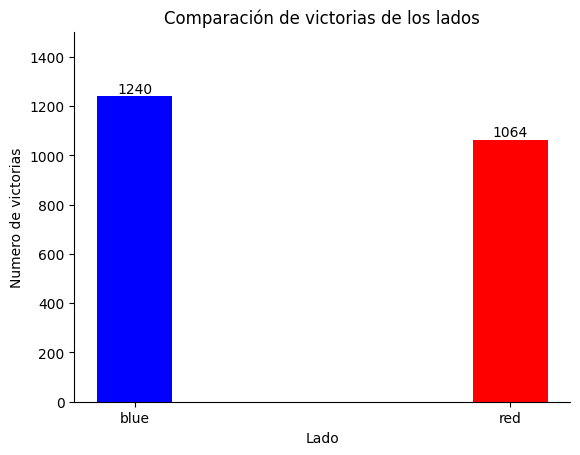

In [54]:
# Histograma para conteo absoluto y donete para porcentaje

fig, ax = plt.subplots()

ax.set_title("Comparación de victorias de los lados")
ax.set_xlabel("Lado")
ax.set_ylabel("Numero de victorias")
ax.set_ylim(0,1500)
bar_withd = 0.20

ax.spines['right'].set_visible(False) # oculta el borde derecho
ax.spines['top'].set_visible(False) # oculta el borde superior

blue = ax.bar("blue", major_leagues["t1_result"][major_leagues["t1_result"] == 1].value_counts(),bar_withd, color = "blue")
red = ax.bar("red", major_leagues["t2_result"][major_leagues["t2_result"] == 1].value_counts(), bar_withd, color = "red")

ax.bar_label(blue)
ax.bar_label(red);

In [55]:
blue_victories = ["blue" for result in major_leagues["t1_result"] if result == 1]
len(blue_victories)

1240

In [56]:
red_victories = ["red" for result in major_leagues["t2_result"] if result == 1]
len(red_victories)

1064

<Axes: ylabel='count'>

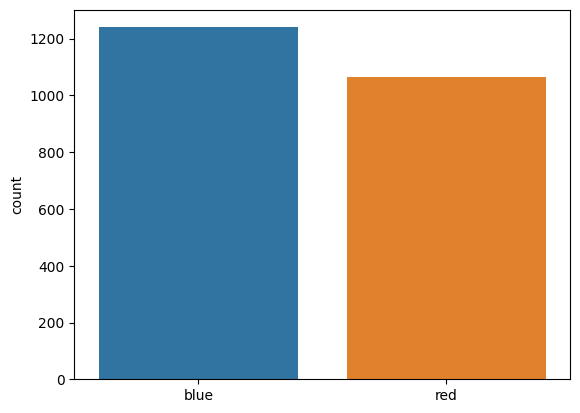

In [57]:
side_victories = blue_victories + red_victories
len(side_victories)
sns.countplot(x = side_victories, hue=side_victories)

In [58]:
plotly_barras = pd.DataFrame(dict(side = ["Blue", "Red"], victories = [len(blue_victories), len(red_victories)]))
plotly_barras

,side,victories
0,Blue,1240
1,Red,1064


In [61]:
fig = px.bar(plotly_barras, x = "side", y = "victories", color = "side", color_discrete_map = {'Blue': '#0925A4', 'Red': "#CF2D0B"})
fig